In [ ]:
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=ae95383835d1daff8175c42a7eca336fed3df99125b43bf5dae760df9e437cb6
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [ ]:
%load_ext autotime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping, ModelCheckpoint
import pickle

import os
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
# !cat /proc/cpuinfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
time: 26.1 s


In [ ]:
#provide your url
DATA_PATH= 'drive/My Drive/PATH/'

time: 738 µs


In [ ]:
x = pickle.load(open(DATA_PATH+'X.pickle','rb'))
y = pickle.load(open(DATA_PATH+'y.pickle','rb'))

time: 475 ms


In [ ]:
# zero=[]
# for i in y:
#   if i == 0:
#     zero.append(i)
# print(len(zero))


2000
time: 3.21 ms


In [ ]:
print("Length of x: ", len(x))
print("Length of y: ", len(y))

Length of x:  20000
Length of y:  20000
time: 1.23 ms


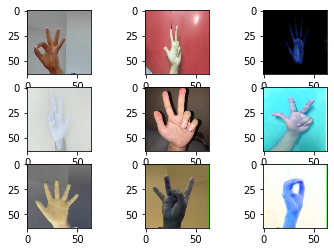

time: 1.09 s


In [ ]:
# listRange = range(70, 79, 1)
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x[i])
plt.show()

In [ ]:
y[:9]

[9, 3, 5, 3, 3, 3, 5, 8, 0]

time: 2.3 ms


In [ ]:
x[0].shape

(64, 64, 3)

time: 4.56 ms


In [ ]:
IMG_SIZE = 64
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

time: 69.3 ms


In [ ]:
x[0]

In [ ]:
x=x/255.0

time: 665 ms


In [ ]:
x[0]

In [ ]:
#stratify=Target splits equal number of testing data point in each class
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, stratify=y)

time: 624 ms


In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (16000, 64, 64, 3)
ytest shape:  (4000, 64, 64, 3)
time: 1.3 ms


In [ ]:
zero=[]
for index, (image, label) in enumerate(zip(xtest, ytest)):
  if label ==5:
    zero.append(image)
len(zero)

400

time: 16.3 ms


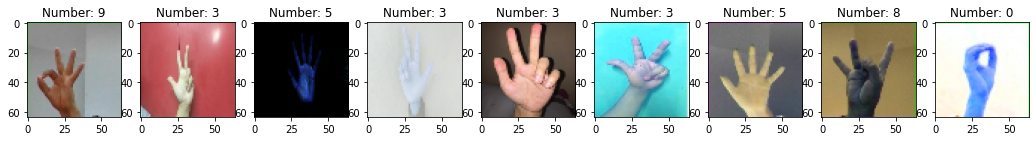

time: 967 ms


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[:9], y[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)

In [ ]:
# VGG16 Style Architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=xtrain.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

time: 4.86 s


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

time: 20.2 ms


In [ ]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"

# Call back
mc = ModelCheckpoint(filepath, monitor ='loss', verbose = 1, save_best_only=True, mode = 'max')
es = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min',restore_best_weights=True)
sheduler_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
callbacks = [mc,es, sheduler_lr]

time: 2.82 ms


In [ ]:
# history = model.fit(xtrain,validation_data=xtest, batch_size=32, epochs=5, verbose=1, callbacks=callbacks)
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=500, batch_size=32, verbose=1, callbacks=callbacks)

Epoch 1/500
500/500 [==============================] - ETA: 0s - loss: 1.6303 - accuracy: 0.4807
Epoch 00001: loss improved from -inf to 1.63027, saving model to weights-improvement-01-0.68.h5
500/500 [==============================] - 8s 16ms/step - loss: 1.6303 - accuracy: 0.4807 - val_loss: 1.0238 - val_accuracy: 0.6780
Epoch 2/500
497/500 [============================>.] - ETA: 0s - loss: 0.6169 - accuracy: 0.8004
Epoch 00002: loss did not improve from 1.63027
500/500 [==============================] - 8s 15ms/step - loss: 0.6159 - accuracy: 0.8008 - val_loss: 0.4528 - val_accuracy: 0.8528
Epoch 3/500
497/500 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.8891
Epoch 00003: loss did not improve from 1.63027
500/500 [==============================] - 8s 15ms/step - loss: 0.3415 - accuracy: 0.8890 - val_loss: 0.3132 - val_accuracy: 0.9030
Epoch 4/500
497/500 [============================>.] - ETA: 0s - loss: 0.2162 - accuracy: 0.9283
Epoch 00004: loss did not 

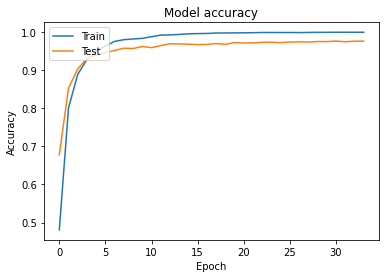

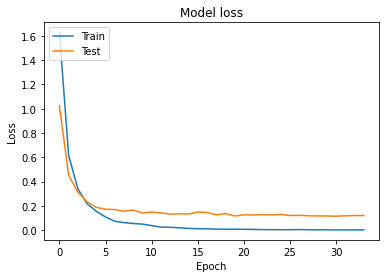

time: 297 ms


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Confusion Matrix for Testing

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(ytest, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'Eight', 'Nine']
print(classification_report(ytest, y_pred, target_names=target_names))

Confusion Matrix
[[394   0   1   1   0   0   0   1   1   2]
 [  1 394   1   1   0   0   1   0   0   2]
 [  0   2 393   1   0   0   2   0   1   1]
 [  0   1   2 394   1   2   0   0   0   0]
 [  0   1   1   0 387   1   6   2   2   0]
 [  0   0   0   3   2 391   1   0   1   2]
 [  0   2   1   0   0   0 391   6   0   0]
 [  0   0   3   1   0   2   8 380   2   4]
 [  0   0   4   1   0   2   0   0 392   1]
 [  1   0   1   3   1   1   1   2   1 389]]
Classification Report
              precision    recall  f1-score   support

        Zero       0.99      0.98      0.99       400
         One       0.98      0.98      0.98       400
         Two       0.97      0.98      0.97       400
       Three       0.97      0.98      0.98       400
        Four       0.99      0.97      0.98       400
        Five       0.98      0.98      0.98       400
         Six       0.95      0.98      0.97       400
       Seven       0.97      0.95      0.96       400
       Eight       0.98      0.98      0.98

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Confusion Matrix')

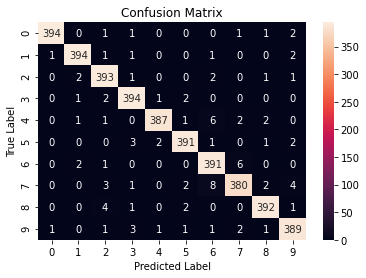

time: 1.28 s


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
matrix = confusion_matrix(ytest,y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

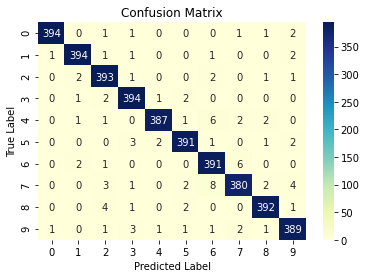

time: 1.1 s


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(xtest, len(xtest))
matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
correctClass =[]
for label, predict in zip(ytest, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
  else:
    correctClass.append(index)

  index +=1
print('Total number of misclassified class: ', len(misclassifiedIndexes))
print('Total number of correctly classified class: ', len(correctClass))
print('Total number testing data: ', len(misclassifiedIndexes)+len(correctClass))

Total number of misclassified class:  95
Total number of correctly classified class:  3905
Total number testing data:  4000
time: 6.45 ms


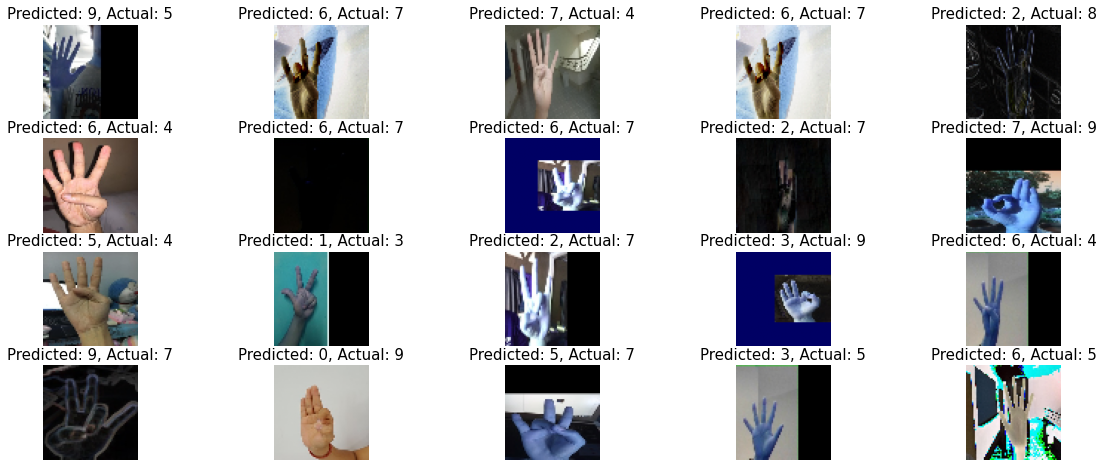

time: 846 ms


In [ ]:
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,8))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:20]):
 plt.subplot(4, 5, plotIndex + 1)
 plt.axis('off')
 plt.imshow(xtest[badIndex])
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], ytest[badIndex]), fontsize = 15)

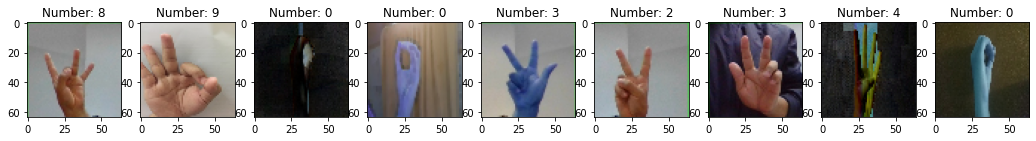

time: 909 ms


In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(xtest[:9], ytest[:9])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image)
 plt.title('Number: %i' % label, fontsize = 12)